In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('trainMLP.csv')

In [3]:
print(df.shape)
print(df.columns)

(31428, 27)
Index(['label', 'id', 'visitTime', 'purchaseTime', 'hour', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'C9', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'C10', 'C11', 'C12'],
      dtype='object')


In [4]:
df.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,37,19274330,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,55,19274334,-1,0,3191875643,403381353,1238330876,652481754,2967512603,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,114,19274353,-1,0,2634604934,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,128,19274358,-1,0,2569487005,403381353,296915027,652481754,2967512603,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,164,19274367,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646


In [5]:
df.describe()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
count,31428.000000,31428.000000,3.142800e+04,3.142800e+04,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,...,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04
mean,-0.996373,321870.448835,1.931855e+07,3.504330e+04,11.799701,2.264373e+09,1.331820e+09,2.255368e+09,1.018468e+09,2.741699e+09,...,0.134307,0.002386,0.027269,0.002164,0.415680,0.042319,0.057560,2.218926e+09,2.939366e+09,2.158890e+09
std,0.085098,184665.780120,1.690395e+04,8.221503e+05,4.695434,1.077516e+09,7.900907e+08,1.125852e+09,7.260969e+08,3.771211e+08,...,1.258795,0.156001,0.562668,0.079745,3.184785,1.008314,1.158253,1.235285e+09,1.020598e+09,1.416777e+09
min,-1.000000,37.000000,1.927433e+07,-1.000000e+00,0.000000,7.942600e+04,4.033814e+08,5.538985e+06,3.063949e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626600e+04,4.393702e+07,2.456084e+08
25%,-1.000000,162636.500000,1.930609e+07,-1.000000e+00,8.000000,1.464958e+09,4.033814e+08,1.408383e+09,6.524818e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140301e+09,2.379634e+09,1.213939e+09
50%,-1.000000,322691.500000,1.931761e+07,-1.000000e+00,12.000000,2.569487e+09,1.235983e+09,2.243934e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.274128e+09,3.617852e+09,1.284343e+09
75%,-1.000000,481852.000000,1.933113e+07,-1.000000e+00,15.000000,2.834768e+09,2.018710e+09,3.326547e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.376114e+09,3.831440e+09,4.220792e+09
max,1.000000,638505.000000,1.936054e+07,1.935732e+07,23.000000,4.294924e+09,2.541204e+09,4.292704e+09,2.308171e+09,3.955179e+09,...,20.000000,20.000000,20.000000,10.000000,97.000000,85.000000,86.000000,4.294964e+09,3.831440e+09,4.220792e+09


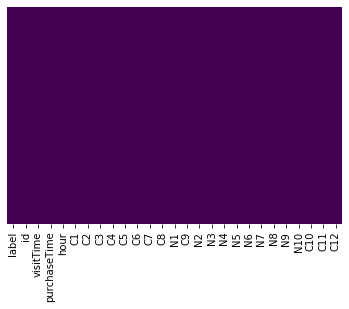

In [6]:
#missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We have no missing values

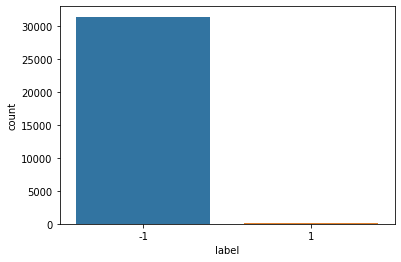

In [7]:
#Class distribution
sns.countplot(data=df, x='label')

We have an imbalanced distribution, for the sake of our model we will need to use SMOTE

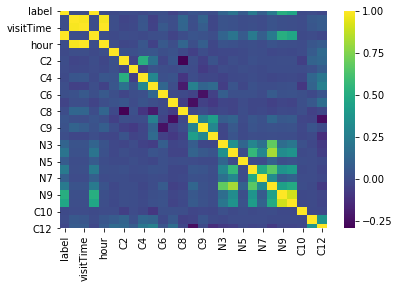

In [8]:
#Correlation
sns.heatmap(df.corr(), cmap = 'viridis')

Nothing alarming for the corellation matrix, the variables related to time are highly correlated but it's logical

# SPLIT


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# We only keep one time variable
X = df [['hour', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'C9', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'C10', 'C11', 'C12']]
y = df ['label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.30, stratify = y)

Smote to oversample the minority class

In [12]:
!pip install imblearn

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
smt = SMOTE(sampling_strategy = 'minority', random_state = 101)
X_train, y_train = smt.fit_resample(X_train, y_train)

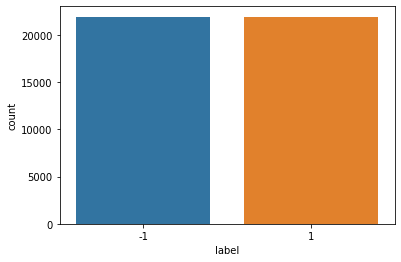

In [15]:
#Visualize distribution
sns.countplot(y_train) 

New distribution is ok

# Logistic regression

We used different level of regularization by switching the C parameter. 
We want to avoid overfitting due to imbalanced datasets.

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
C = [10, 1, .1, .001]

In [18]:
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C=', c)
    print('Coefficient:', clf.coef_)
    print('Accuracy on the TRAINING set:', clf.score(X_train, y_train))
    print('Accuracy on the TEST set', clf.score(X_test, y_test))
  

/Users/kevinndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C= 10
Coefficient: [[-5.80359756e-02  1.12749796e-10 -1.04434405e-09  1.73672775e-10
   5.63984832e-10 -2.20499029e-09  2.01765100e-10 -6.18766461e-10
   7.10939621e-10 -2.03730041e-01  1.86580017e-09 -8.14914889e-01
   5.29750581e-01 -1.83295013e+00  7.84602517e-01  1.02211302e+00
  -2.70731870e+01  1.67970400e-01  6.19527849e+00 -2.88286701e+00
   7.40910653e-11  6.08369825e-10  1.70932993e-10]]
Accuracy on the TRAINING set: 0.966870076050822
Accuracy on the TEST set 0.9766677272245201


/Users/kevinndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C= 1
Coefficient: [[-5.82294002e-02  1.05098310e-10 -1.04902085e-09  1.72122677e-10
   5.64197628e-10 -2.24021750e-09  1.99258874e-10 -6.41854377e-10
   7.02394466e-10 -1.99675775e-01  1.86615719e-09 -7.97641015e-01
   5.29228674e-01 -1.84310693e+00  5.78173959e-01  1.02019850e+00
  -2.34901586e+01  1.66382580e-01  5.56264196e+00 -2.29240068e+00
   6.89584875e-11  6.02658210e-10  1.75228434e-10]]
Accuracy on the TRAINING set: 0.9668928457580036
Accuracy on the TEST set 0.9767737830098632


/Users/kevinndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C= 0.1
Coefficient: [[-6.06827951e-02  9.04527211e-11 -1.07760499e-09  1.62806508e-10
   5.94743752e-10 -2.42102902e-09  1.98336515e-10 -7.29502378e-10
   6.53732562e-10 -1.80008360e-01  1.84921805e-09 -7.10830919e-01
   4.84411842e-01 -1.60200017e+00  0.00000000e+00  6.06106583e-01
   0.00000000e+00  1.83851584e-01  3.58540440e+00 -4.49691210e-01
   4.92560743e-11  5.53201885e-10  2.03074351e-10]]
Accuracy on the TRAINING set: 0.9668017669292773
Accuracy on the TEST set 0.9767737830098632
C= 0.001
Coefficient: [[-3.29963873e-02 -1.03983480e-10 -7.03713188e-10  9.77446102e-11
   3.30625723e-10 -2.45762719e-09  3.48526584e-10 -8.10744059e-10
   3.47456163e-10  0.00000000e+00  1.40634844e-09 -8.41434048e-02
   3.39870133e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.35574849e-02  1.37079889e+00  0.00000000e+00
  -3.87531590e-11  3.32774998e-10  2.00806408e-10]]
Accuracy on the TRAINING set: 0.951933148139715
Accuracy on the TEST set 0.9712588821720225


/Users/kevinndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The best accuracy is achieved with C= 0.1

In [19]:
LR_model = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')
LR_model.fit(X_train, y_train)

/Users/kevinndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred_LR = LR_model.predict(X_test)

In [21]:
y_prob_LR = LR_model.predict_proba(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [23]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

          -1       1.00      0.98      0.99      9412
           1       0.06      0.88      0.12        17

    accuracy                           0.98      9429
   macro avg       0.53      0.93      0.55      9429
weighted avg       1.00      0.98      0.99      9429



In [24]:
confusion_matrix(y_test, y_pred_LR)

array([[9193,  219],
       [   2,   15]])

In [25]:
roc_auc_score(y_test, y_pred_LR)

0.9295423864403389

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
RF_model = RandomForestClassifier(n_estimators=150)

In [28]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
# Class label
y_pred_RF = RF_model.predict(X_test) 

In [30]:
# Probability
y_prob_RF = RF_model.predict_proba(X_test)

In [31]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      9412
           1       0.56      0.59      0.57        17

    accuracy                           1.00      9429
   macro avg       0.78      0.79      0.79      9429
weighted avg       1.00      1.00      1.00      9429



In [32]:
roc_auc_score(y_test, y_pred_RF)

0.7936926576835579

# Model Deployment

In [33]:
df_test = pd.read_csv('test1.csv')

In [34]:
df_test.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,1,19360733,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,2128770044,3617851689,4220791646
1,-1,2,19360734,-1,0,2416811818,1235983246,3653557526,652481754,2116767313,...,0,0,0,0,0,0,0,4256459078,2379633508,1284343215
2,-1,3,19360735,-1,0,3765056181,1235983246,1310333812,652481754,2116767313,...,0,0,0,0,0,0,0,2840358457,3831440054,1213938795
3,-1,4,19360737,-1,0,955802445,403381353,2290282995,652481754,2967512603,...,0,0,0,0,0,0,0,4039873369,535829057,3828748840
4,-1,5,19360752,-1,0,2569487005,2517724481,2463986301,2308170622,2967512603,...,0,0,0,0,0,0,0,907610626,3617851689,4220791646


In [35]:
final_id = df_test ['id']

In [36]:
# Remove unwanted feature
df_test.drop(labels=['label', 'id', 'visitTime', 'purchaseTime'], axis=1, inplace=True)

In [37]:
df_test.head()

,hour,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,157533148,0,...,0,0,0,0,0,0,0,2128770044,3617851689,4220791646
1,0,2416811818,1235983246,3653557526,652481754,2116767313,571765677,2303407174,2374954832,0,...,0,0,0,0,0,0,0,4256459078,2379633508,1284343215
2,0,3765056181,1235983246,1310333812,652481754,2116767313,571765677,2303407174,2374954832,0,...,0,0,0,0,0,0,0,2840358457,3831440054,1213938795
3,0,955802445,403381353,2290282995,652481754,2967512603,1607619193,1342367140,3588031319,4,...,0,0,0,0,0,0,0,4039873369,535829057,3828748840
4,0,2569487005,2517724481,2463986301,2308170622,2967512603,580883881,2303407174,157533148,0,...,0,0,0,0,0,0,0,907610626,3617851689,4220791646


In [38]:
X_value = df_test

In [39]:
y_value = LR_model.predict_proba(X_value)

In [40]:
final_prob = y_value[:,1]

In [41]:
df_test['id'] = final_id

In [42]:
df_test['Prob'] = final_prob

In [43]:
df_test.head()

,hour,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N6,N7,N8,N9,N10,C10,C11,C12,id,Prob
0,0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,157533148,0,...,0,0,0,0,0,2128770044,3617851689,4220791646,1,0.009979
1,0,2416811818,1235983246,3653557526,652481754,2116767313,571765677,2303407174,2374954832,0,...,0,0,0,0,0,4256459078,2379633508,1284343215,2,0.059440
2,0,3765056181,1235983246,1310333812,652481754,2116767313,571765677,2303407174,2374954832,0,...,0,0,0,0,0,2840358457,3831440054,1213938795,3,0.083806
3,0,955802445,403381353,2290282995,652481754,2967512603,1607619193,1342367140,3588031319,4,...,0,0,0,0,0,4039873369,535829057,3828748840,4,0.257301
4,0,2569487005,2517724481,2463986301,2308170622,2967512603,580883881,2303407174,157533148,0,...,0,0,0,0,0,907610626,3617851689,4220791646,5,0.003174


In [44]:
#selecting only Id and probability columns
df_test = df_test[['id', 'Prob']]

In [45]:
df_test.head()

,id,Prob
0,1,0.009979
1,2,0.059440
2,3,0.083806
3,4,0.257301
4,5,0.003174


In [46]:
#saving output to csv
df_test.to_csv('Kevin_Ndiaye_E197417_Output.csv', index=False)